In [1]:
from dotenv import load_dotenv
from functions.MySQL_io import MySQLConnection
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
load_dotenv()

user = os.getenv('SQL_USER')
password = os.getenv('SQL_PASSWORD')
database = os.getenv('DATABASE')
port = os.getenv('SQL_PORT')
server = os.getenv('SQL_SERVER')

In [4]:
con = MySQLConnection(port, database, user, password, server)

lap_data = con.run_query(query='''
    SELECT
        IFNULL(LapTimeFP1, 0) AS LapTimeFP1,
        IFNULL(CompoundFP1, 0) AS CompoundFP1,
        IFNULL(AirTempFP1, 0) AS AirTempFP1,
        IFNULL(RainfallFP1, 0) AS RainfallFP1,
        IFNULL(TrackTempFP1, 0) AS TrackTempFP1,
        CASE WHEN isnull(LapTimeFP1) THEN 1 ELSE 0 END AS FP1_Missing_Flag,
        IFNULL(LapTimeFP2, 0) AS LapTimeFP2,
        IFNULL(CompoundFP2, 0) AS CompoundFP2,
        IFNULL(AirTempFP2, 0) AS AirTempFP2,
        IFNULL(RainfallFP2, 0) AS RainfallFP2,
        IFNULL(TrackTempFP2, 0) AS TrackTempFP2,
        CASE WHEN year <= 2022 THEN CASE WHEN isnull(LapTimeFP2) THEN 1 ELSE 0 END ELSE 0 END FP2_Missing_Flag,
        IFNULL(LapTimeFP3, 0) AS LapTimeFP3,
        IFNULL(CompoundFP3, 0) AS CompoundFP3,
        IFNULL(AirTempFP3, 0) AS AirTempFP3,
        IFNULL(RainfallFP3, 0) AS RainfallFP3,
        IFNULL(TrackTempFP3, 0) AS TrackTempFP3,
        0 AS FP3_Missing_Flag,
        LapTimeQ,
        AirTempQ,
        RainfallQ,
        sprint_flag as is_sprint,
        traction,
        tyre_stress,
        asphalt_grip,
        braking,
        asphalt_abrasion,
        lateral_force,
        track_evolution,
        downforce
    FROM cleaned_session_data
    where sprint_flag = 1 and
    LapTimeQ is not NULL
    UNION ALL
    SELECT
        IFNULL(LapTimeFP1, 0) AS LapTimeFP1,
        IFNULL(CompoundFP1, 0) AS CompoundFP1,
        IFNULL(AirTempFP1, 0) AS AirTempFP1,
        IFNULL(RainfallFP1, 0) AS RainfallFP1,
        IFNULL(TrackTempFP1, 0) AS TrackTempFP1,
        CASE WHEN isnull(LapTimeFP1) THEN 1 ELSE 0 END AS FP1_Missing_Flag,
        IFNULL(LapTimeFP2, 0) AS LapTimeFP2,
        IFNULL(CompoundFP2, 0) AS CompoundFP2,
        IFNULL(AirTempFP2, 0) AS AirTempFP2,
        IFNULL(RainfallFP2, 0) AS RainfallFP2,
        IFNULL(TrackTempFP2, 0) AS TrackTempFP2,
        CASE WHEN isnull(LapTimeFP2) THEN 1 ELSE 0 END AS FP2_Missing_Flag,
        IFNULL(LapTimeFP3, 0) AS LapTimeFP3,
        IFNULL(CompoundFP3, 0) AS CompoundFP3,
        IFNULL(AirTempFP3, 0) AS AirTempFP3,
        IFNULL(RainfallFP3, 0) AS RainfallFP3,
        IFNULL(TrackTempFP3, 0) AS TrackTempFP3,
        CASE WHEN isnull(LapTimeFP3) THEN 1 ELSE 0 END AS FP3_Missing_Flag,
        LapTimeQ,
        AirTempQ,
        RainfallQ,
        sprint_flag as is_sprint,
        traction,
        tyre_stress,
        asphalt_grip,
        braking,
        asphalt_abrasion,
        lateral_force,
        track_evolution,
        downforce
    FROM cleaned_session_data
    where sprint_flag = 0 and
    LapTimeQ is not NULL 
    ''')

# Data Cleaning

In [5]:
lap_data = lap_data.astype(float)

In [6]:
lap_data.count()

LapTimeFP1          2432
CompoundFP1         2432
AirTempFP1          2432
RainfallFP1         2432
TrackTempFP1        2432
FP1_Missing_Flag    2432
LapTimeFP2          2432
CompoundFP2         2432
AirTempFP2          2432
RainfallFP2         2432
TrackTempFP2        2432
FP2_Missing_Flag    2432
LapTimeFP3          2432
CompoundFP3         2432
AirTempFP3          2432
RainfallFP3         2432
TrackTempFP3        2432
FP3_Missing_Flag    2432
LapTimeQ            2432
AirTempQ            2432
RainfallQ           2432
is_sprint           2432
traction            2432
tyre_stress         2432
asphalt_grip        2432
braking             2432
asphalt_abrasion    2432
lateral_force       2432
track_evolution     2432
downforce           2432
dtype: int64

In [7]:
lap_data.head()

,LapTimeFP1,CompoundFP1,AirTempFP1,RainfallFP1,TrackTempFP1,FP1_Missing_Flag,LapTimeFP2,CompoundFP2,AirTempFP2,RainfallFP2,...,RainfallQ,is_sprint,traction,tyre_stress,asphalt_grip,braking,asphalt_abrasion,lateral_force,track_evolution,downforce
0,88.449,2.0,25.4,0.0,46.9,0.0,91.188,1.0,25.2,0.0,...,0.0,1.0,3.0,5.0,3.0,2.0,3.0,5.0,2.0,4.0
1,88.163,1.0,25.5,0.0,47.2,0.0,90.800,2.0,25.2,0.0,...,0.0,1.0,3.0,5.0,3.0,2.0,3.0,5.0,2.0,4.0
2,88.873,2.0,25.9,0.0,49.0,0.0,91.289,1.0,25.3,0.0,...,0.0,1.0,3.0,5.0,3.0,2.0,3.0,5.0,2.0,4.0
3,87.828,1.0,26.1,0.0,48.8,0.0,90.277,2.0,25.4,0.0,...,0.0,1.0,3.0,5.0,3.0,2.0,3.0,5.0,2.0,4.0
4,89.597,2.0,25.6,0.0,47.7,0.0,92.041,2.0,25.4,0.0,...,0.0,1.0,3.0,5.0,3.0,2.0,3.0,5.0,2.0,4.0


In [8]:
lap_data.isna().sum()

LapTimeFP1          0
CompoundFP1         0
AirTempFP1          0
RainfallFP1         0
TrackTempFP1        0
FP1_Missing_Flag    0
LapTimeFP2          0
CompoundFP2         0
AirTempFP2          0
RainfallFP2         0
TrackTempFP2        0
FP2_Missing_Flag    0
LapTimeFP3          0
CompoundFP3         0
AirTempFP3          0
RainfallFP3         0
TrackTempFP3        0
FP3_Missing_Flag    0
LapTimeQ            0
AirTempQ            0
RainfallQ           0
is_sprint           0
traction            0
tyre_stress         0
asphalt_grip        0
braking             0
asphalt_abrasion    0
lateral_force       0
track_evolution     0
downforce           0
dtype: int64

### Test Train Split (80 - 20)

In [10]:
train_data = lap_data.sample(frac=0.8, random_state=0)
test_data = lap_data.drop(train_data.index)

# Data Exploration

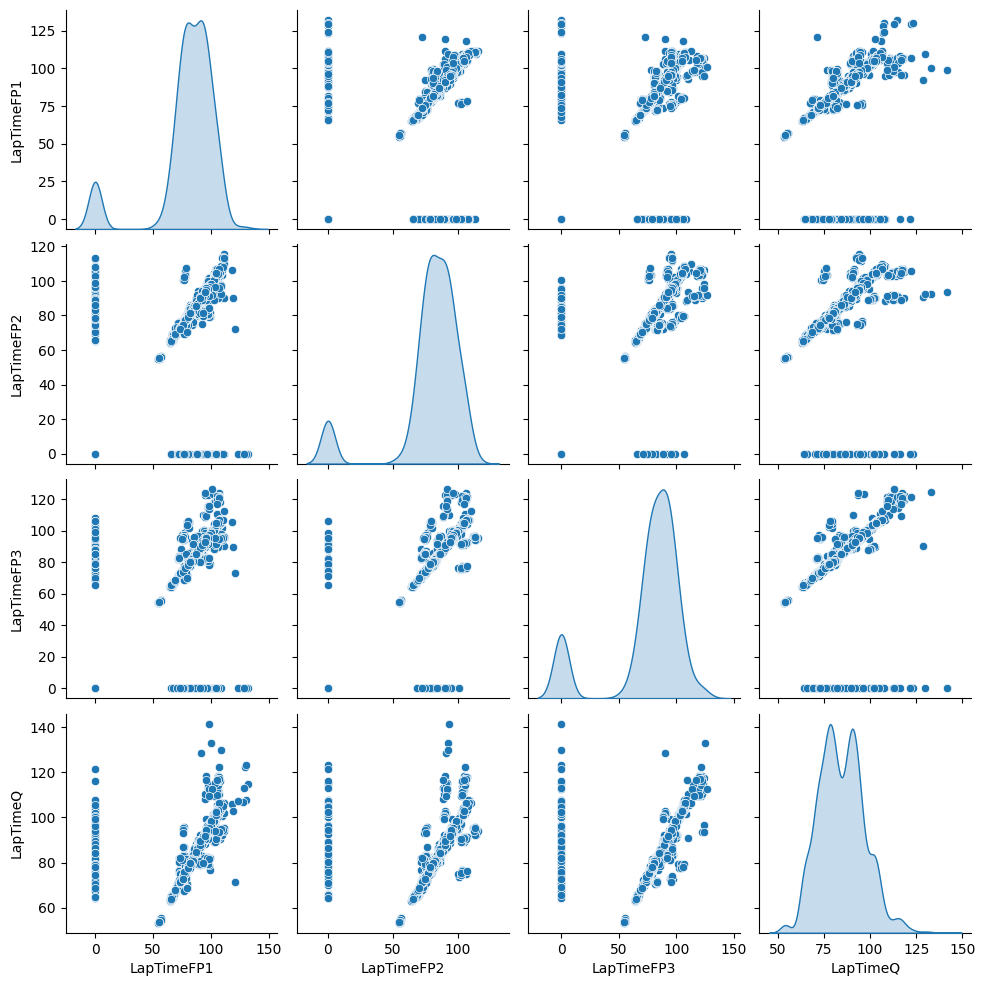

In [11]:
sns.pairplot(train_data[['LapTimeFP1', 'LapTimeFP2', 'LapTimeFP3', 'LapTimeQ']], diag_kind='kde')

In [12]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LapTimeFP1,1946.0,80.027693,26.120639,0.000,75.0865,84.9510,94.99100,132.085
CompoundFP1,1946.0,1.393114,0.925021,0.000,1.0000,1.0000,2.00000,5.000
AirTempFP1,1946.0,22.063258,8.222807,0.000,18.8000,23.0000,27.70000,36.200
RainfallFP1,1946.0,0.036485,0.187542,0.000,0.0000,0.0000,0.00000,1.000
TrackTempFP1,1946.0,33.703443,13.204653,0.000,26.9000,36.8000,42.30000,59.200
FP1_Missing_Flag,1946.0,0.078109,0.268412,0.000,0.0000,0.0000,0.00000,1.000
LapTimeFP2,1946.0,79.272720,25.030741,0.000,74.5105,83.5460,93.02225,115.348
CompoundFP2,1946.0,1.225077,0.787896,0.000,1.0000,1.0000,1.00000,5.000
AirTempFP2,1946.0,22.311665,7.866670,0.000,19.6000,23.8000,27.20000,37.900
RainfallFP2,1946.0,0.030832,0.172908,0.000,0.0000,0.0000,0.00000,1.000


# Model Prep

In [13]:
train_features = train_data.copy()
test_features = test_data.copy()

train_labels = train_features.pop('LapTimeQ')
test_labels = test_features.pop('LapTimeQ')

### Normalization

In [14]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [15]:
normalizer.adapt(np.array(train_features))

In [16]:
normalizer.mean.numpy()

array([[8.00276947e+01, 1.39311409e+00, 2.20632572e+01, 3.64850983e-02,
        3.37034416e+01, 7.81089440e-02, 7.92727203e+01, 1.22507703e+00,
        2.23116646e+01, 3.08324769e-02, 3.27811928e+01, 2.51798555e-02,
        7.57034378e+01, 1.27183962e+00, 2.04920349e+01, 3.69989723e-02,
        3.10340176e+01, 2.46659815e-02, 2.35469685e+01, 3.90544720e-02,
        1.01233296e-01, 3.43525171e+00, 3.34224057e+00, 2.62487149e+00,
        3.20452213e+00, 2.95734835e+00, 3.11562181e+00, 3.68139768e+00,
        3.26721478e+00]], dtype=float32)

# Linear Model

In [17]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [18]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [19]:
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

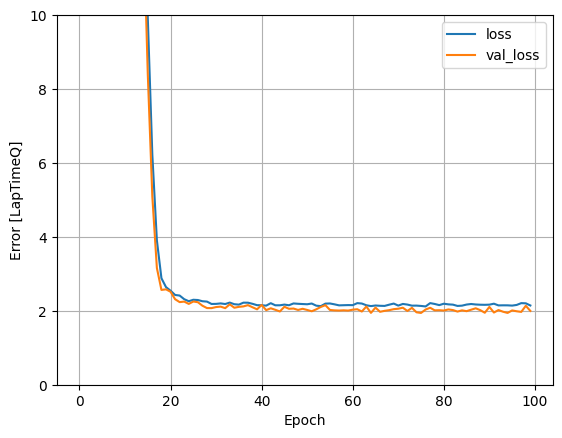

In [20]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [LapTimeQ]')
plt.legend()
plt.grid(True)

In [21]:
linear_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 29)                  │              59 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              30 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151 (612.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 59 (240.00 B)

 Optimizer params: 62 (252.00 B)

### Save Results

In [22]:
test_results = pd.DataFrame()

test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [23]:
test_results.to_csv('linear_model.csv')

In [24]:
linear_model.save('linar_model.keras')

### Evaluation

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


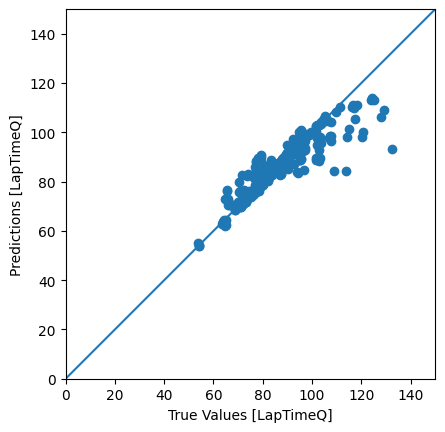

In [25]:
test_predictions = linear_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [LapTimeQ]')
plt.ylabel('Predictions [LapTimeQ]')
lims = [0, 150]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

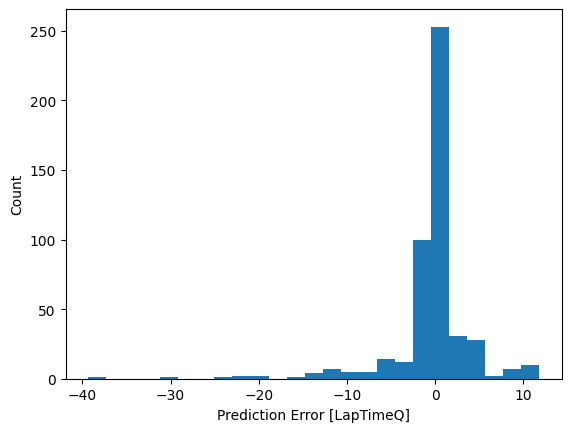

In [26]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [LapTimeQ]')
_ = plt.ylabel('Count')